In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [38]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/archive (10)/insurance.csv")

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# OUTLIER DETECTION

<Axes: >

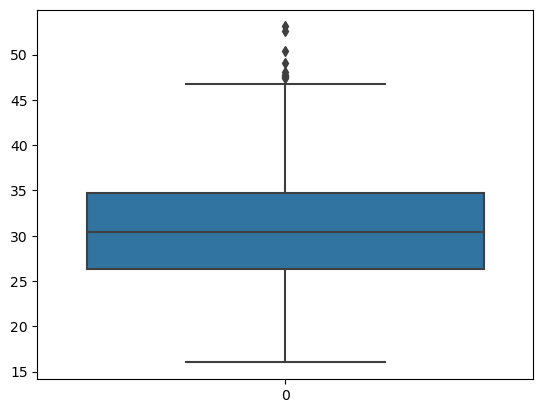

In [9]:
sns.boxplot(df.bmi)

# Outlier removal by replacement by median

In [10]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)

In [11]:
q1

26.3

In [12]:
q3

34.7

In [13]:
IQR=q3-q1

In [14]:
IQR

8.400000000000002

In [15]:
upper_limit=q3+1.5*IQR

In [16]:
upper_limit

47.300000000000004

In [17]:
lower_limit=q1-1.5*IQR

In [18]:
lower_limit

13.699999999999998

In [19]:
df.median()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10300\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


age           39.00
bmi           30.40
children       1.00
expenses    9382.03
dtype: float64

In [20]:
df['bmi']=np.where(df['bmi']>upper_limit,30,df['bmi'])

<Axes: >

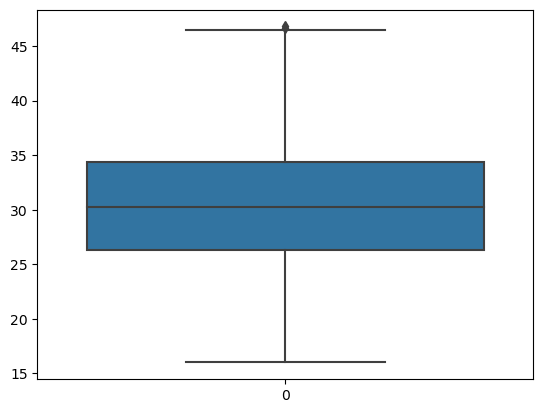

In [21]:
sns.boxplot(df.bmi)

In [22]:
df.shape

(1338, 7)

# Removal Method 


# #1.Outlier removal using IQR

<Axes: >

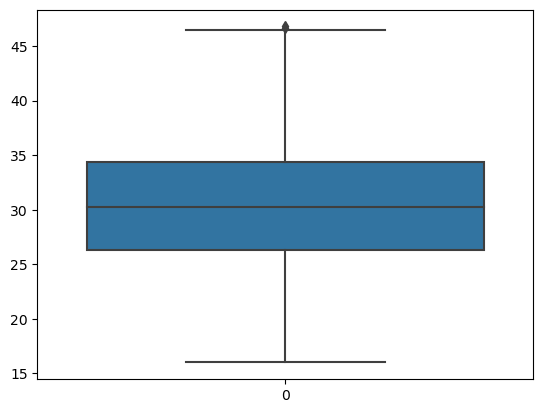

In [23]:
sns.boxplot(df.bmi)

In [24]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)

In [25]:
IQR=q3-q1

In [26]:
upper_limit=q3+1.5*IQR

In [27]:
upper_limit

46.55

In [28]:
df=df[df.bmi<upper_limit]

<Axes: >

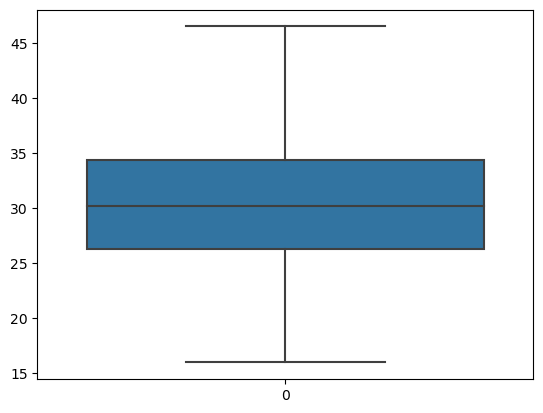

In [29]:
sns.boxplot(df.bmi)

In [30]:
df.shape

(1336, 7)

# Z score for removal

<Axes: >

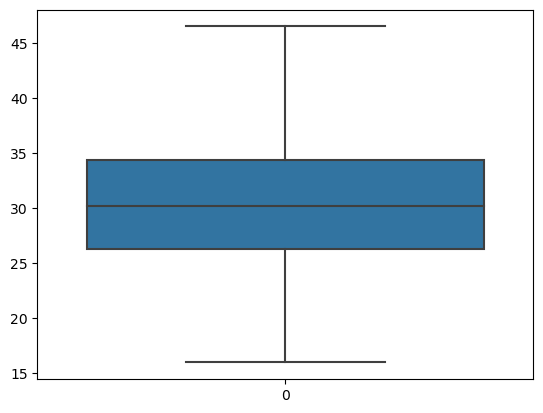

In [31]:
sns.boxplot(df.bmi)

In [32]:
from scipy import stats

In [33]:
bmi_zscore=stats.zscore(df.bmi)

In [34]:
bmi_zscore

0      -0.444963
1       0.560303
2       0.423996
3      -1.330960
4      -0.274579
          ...   
1333    0.083228
1334    0.236574
1335    1.088494
1336   -0.802769
1337   -0.240502
Name: bmi, Length: 1336, dtype: float64

In [36]:
df_z=df[np.abs(bmi_zscore)<=3]

<Axes: >

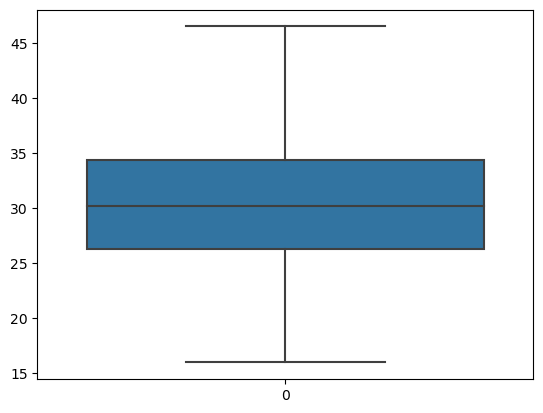

In [37]:
sns.boxplot(df_z.bmi)

# Percentile

<Axes: >

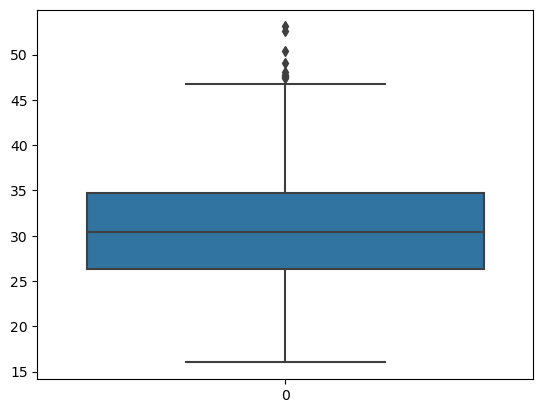

In [41]:
sns.boxplot(df.bmi)

In [42]:
p99=df.bmi.quantile(0.99)

In [43]:
p99

46.38899999999997

In [44]:
df=df[df.bmi<=p99]

In [45]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


<Axes: >

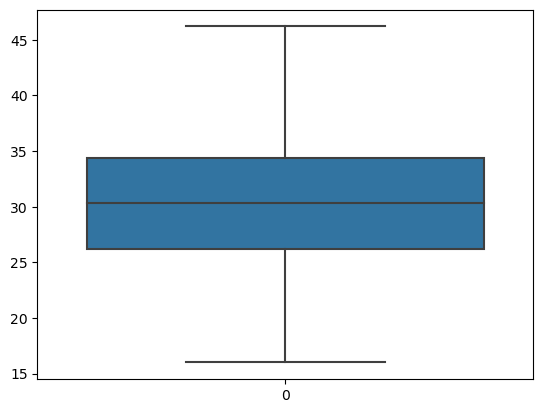

In [46]:
sns.boxplot(df.bmi)

In [47]:
df.shape

(1324, 7)